In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn

In [1]:
from sklearn.datasets import fetch_california_housing
#from sklearn.datasets import load_boston

In [2]:
import sklearn
import numpy as np
import pandas as pd

In [3]:
!pip install --user scikit-learn

In [4]:
!pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcal

In [5]:
boston = pd.read_csv('Boston.csv',index_col=0)

In [6]:
boston.shape

(506, 14)

In [7]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(boston.drop('medv',axis=1),boston['medv'],test_size=0.2)

In [11]:
model = LinearRegression()
model.fit(X=X_train,y=y_train)

LinearRegression()

In [12]:
model.coef_

array([-1.13639180e-01,  4.71975014e-02,  2.14822493e-03,  3.00030413e+00,
       -1.78471775e+01,  3.58990309e+00, -6.38082448e-03, -1.52704299e+00,
        2.70491400e-01, -1.03431937e-02, -9.79694424e-01,  8.45439947e-03,
       -5.24428105e-01])

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [15]:
mse=np.sqrt(mean_squared_error(y_pred,y_test))
mse

5.1000497093933435

In [17]:
err = pd.DataFrame({'actual_price':y_test,'predicted_price':y_pred})

In [19]:
err[:5]

,actual_price,predicted_price
139,13.3,13.532276
440,12.8,12.633858
133,23.0,19.634382
363,20.8,17.863044
275,32.4,36.331042


In [21]:
import matplotlib.pyplot as plt

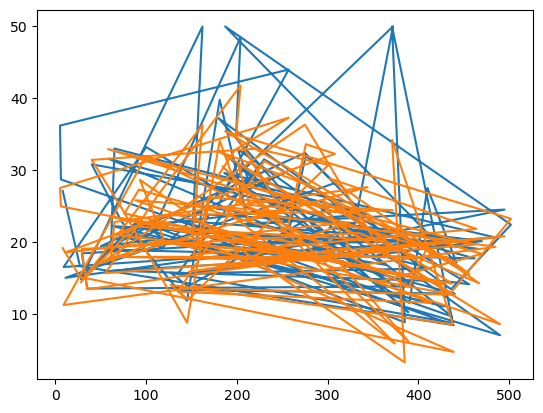

In [22]:
plt.plot(err)

In [23]:
error = err.reindex()

In [26]:
error

,actual_price,predicted_price
139,13.3,13.532276
440,12.8,12.633858
133,23.0,19.634382
363,20.8,17.863044
275,32.4,36.331042
...,...,...
162,50.0,36.287656
151,21.5,20.607411
439,8.4,4.670668
27,16.6,15.106901


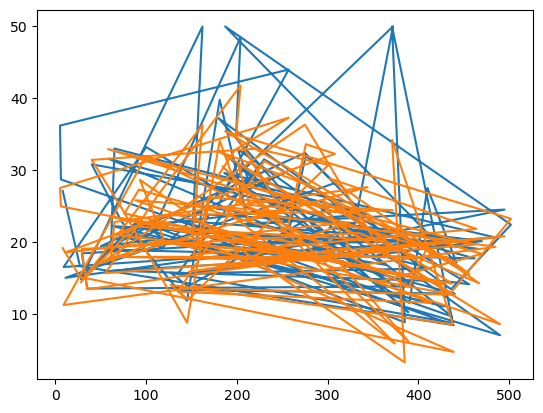

In [24]:
plt.plot(error)

In [25]:
err.sort_index(inplace=True)

In [27]:
err

,actual_price,predicted_price
5,36.2,27.504847
6,28.7,24.946055
8,27.1,19.125377
9,16.5,11.209655
11,15.0,18.539861
...,...,...
470,20.1,18.338192
485,20.6,19.310476
490,7.0,8.544755
495,24.5,20.783344


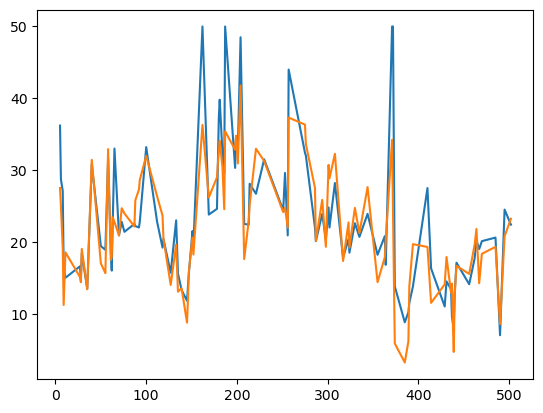

In [28]:
plt.plot(err)

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [70]:
model_tree = DecisionTreeRegressor(max_depth=4)

In [71]:
model_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [72]:
y_pred_tree = model_tree.predict(X_test)

In [73]:
err_tree = mean_squared_error(y_test,y_pred_tree)

In [74]:
err_tree

20.479125605231715

In [75]:
rmse_tree = np.sqrt(err_tree)
rmse_tree

4.525386790676761

In [40]:
!pip install dtreeviz

  Obtaining dependency information for dtreeviz from https://files.pythonhosted.org/packages/b3/e8/44eb59345d8ba9d2f6610df6441d63082f46021c1685de24716c22f55383/dtreeviz-2.2.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/91.8 kB ? eta -:--:--
   ----------------------------------- ---- 81.9/91.8 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 91.8/91.8 kB 1.3 MB/s eta 0:00:00


In [76]:
pip install dtreeviz

Note: you may need to restart the kernel to use updated packages.


In [43]:
import dtreeviz
#from dtreeviz.trees import dtreeviz

In [47]:
from dtreeviz.trees import *

In [77]:
from dtreeviz import dtreeviz
#from dtreeviz.trees import dtreeviz

In [79]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
365,3.47428,0.0,18.10,1,0.7180,8.780,82.9,1.9047,24,666,20.2,354.55,5.29
416,18.08460,0.0,18.10,0,0.6790,6.434,100.0,1.8347,24,666,20.2,27.25,29.05
172,2.31390,0.0,19.58,0,0.6050,5.880,97.3,2.3887,5,403,14.7,348.13,12.03
399,38.35180,0.0,18.10,0,0.6930,5.453,100.0,1.4896,24,666,20.2,396.90,30.59
229,0.29819,0.0,6.20,0,0.5040,7.686,17.0,3.3751,8,307,17.4,377.51,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,14.23620,0.0,18.10,0,0.6930,6.343,100.0,1.5741,24,666,20.2,396.90,20.32
205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88
113,0.12329,0.0,10.01,0,0.5470,5.913,92.9,2.3534,6,432,17.8,394.95,16.21
411,51.13580,0.0,18.10,0,0.5970,5.757,100.0,1.4130,24,666,20.2,2.60,10.11


In [82]:
tree_model = DecisionTreeRegressor(max_depth=4)
tree = dtreeviz(tree_model,X_train,y_train,target_name='medv',feature_names=X_train.columns)

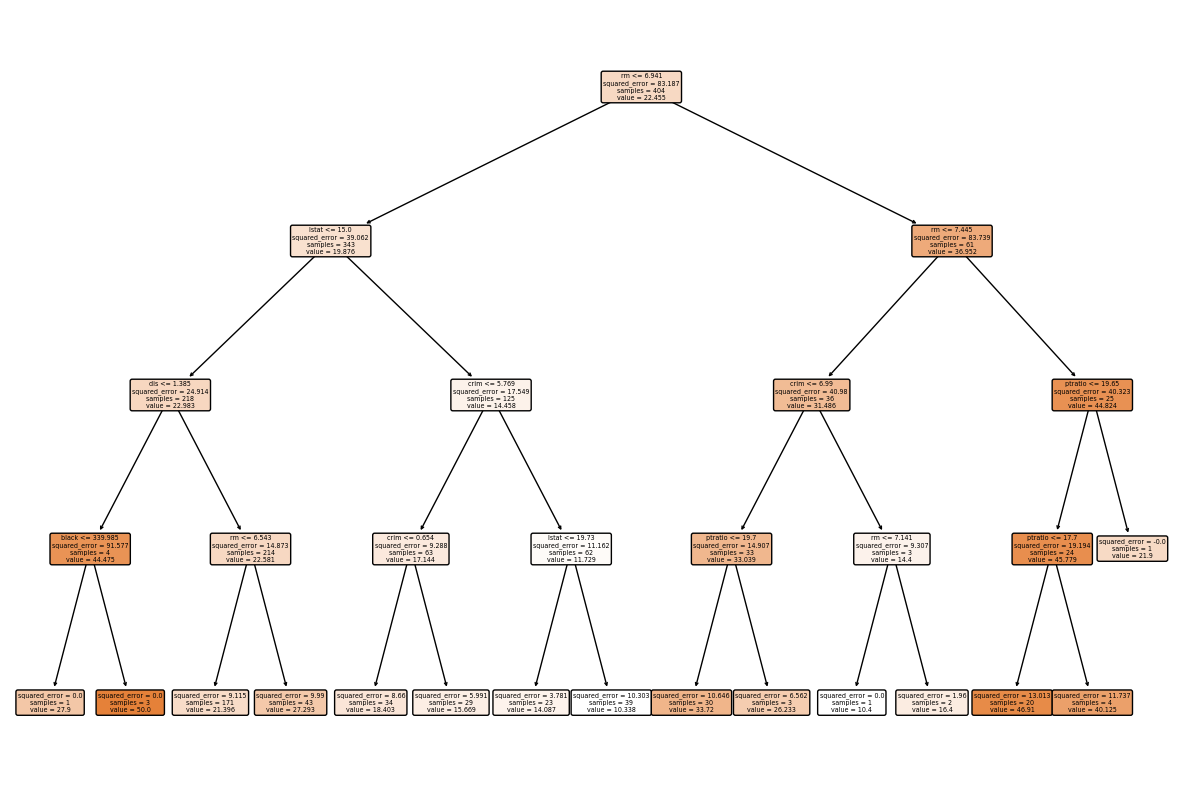

In [86]:
#Using Matplotlib for visualization as dtreeviz is throwing errors
from sklearn.tree import plot_tree
# Convert Index to a list of strings
feature_names_list = X_train.columns.tolist()
plt.figure(figsize=(15, 10))
plot_tree(model_tree, feature_names=feature_names_list, filled=True, rounded=True)
plt.show()

In [88]:
#Using Graphviz
!pip install graphviz

In [89]:
from sklearn.tree import export_graphviz
import graphviz

In [92]:
#dot_path = "path/to/dot/executable"  # Specify the actual path to the dot executable
#graph = graphviz.Source(dot_data, executable=dot_path)

In [93]:
#dot_data = export_graphviz(model_tree, out_file=None,feature_names=X_train.columns,filled=True, rounded=True,special_characters=True)
#graph = graphviz.Source(dot_data)
#graph.render("decision_tree")  # This will save the visualization as "decision_tree.pdf"
#graph.view()  # This will open the rendered visualization in your default viewer

In [94]:
#We are not using Graphviz also because it is also throwing errors

# Random Forest (an ensembleof decision trees)

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [98]:
mse_rf = mean_squared_error(y_test,y_pred_rf)

In [99]:
rmse_rf = np.sqrt(mse_rf)
rmse_rf

3.226720222169387